<a href="https://colab.research.google.com/github/ABHAY7238/Road-to-Data-Scientist-/blob/main/Cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cross validation** <br>
Cross validation is a technique used in a machine learning model to evaluate the performance of the model on unseen data. <br>
It works like spliting the data into training and testing set.<br>
The training set is used to train the model while the test set is used to evaluate the model.

Cross - validation is a statistical technique used to evaluate the performance of a machine learning model and it also evaluate how well the model is generalize to the new data.



**K-fold cross validation** <br>
1. 'K-fold cross validation , the available data is divided into k-parts or folds.'
'2. The model is trained on k-1 folds and evaluated on the remaining fold.'
'3. This process is repeated k times, with each fold serving as the test set once.'


In [14]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , cross_val_score , RandomizedSearchCV
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [17]:
#load the dataset
iris = load_iris()


In [19]:
#define the gaussian naive bayes model
gnb = GaussianNB()
#perform k-fold cross validation with k=5
scores = cross_val_score(gnb, iris.data, iris.target, cv=5 , scoring = 'accuracy')
#print the accuracy scores for each fold
print(scores)
#print the mean accuracy score
print('scores_mean : ',scores.mean())
print('standard_deviation' , scores.std())
print("scores for each folds" , scores)

[0.93333333 0.96666667 0.93333333 0.93333333 1.        ]
scores_mean :  0.9533333333333334
standard_deviation 0.02666666666666666
scores for each folds [0.93333333 0.96666667 0.93333333 0.93333333 1.        ]


**K-Fold cross-validation** vs **train_test_split**

**Purpose:**
- **`train_test_split`**: Divides the dataset into two distinct subsets: a training set to train the model and a testing set to evaluate its performance on unseen data. Its primary goal is to get a single estimate of the model's performance.
- **`K-fold cross-validation`**: A more robust method for evaluating a model's performance and generalization ability. It involves splitting the data into 'k' folds and performing 'k' rounds of training and testing, ensuring each data point is used for both training and validation at least once. This helps in getting a more reliable estimate of model performance and detecting overfitting.

**How they work:**

**`train_test_split`:**
1. The dataset is randomly divided into two parts: a training set (e.g., 70-80% of the data) and a testing set (e.g., 20-30% of the data).
2. The model is trained exclusively on the training set.
3. The trained model's performance is evaluated on the testing set.

**`K-fold cross-validation`:**
1. The dataset is divided into 'k' equally sized folds.
2. In each iteration (from 1 to k):
   - One fold is designated as the validation (test) set.
   - The remaining k-1 folds are used as the training set.
   - The model is trained on the training set and evaluated on the validation set.
3. This process is repeated 'k' times, with each fold serving as the validation set exactly once.
4. The 'k' performance scores are then averaged to get a single, more reliable performance estimate.

**Advantages:**

**`train_test_split`:**
- **Simplicity and Speed**: It's quick and easy to implement, especially for large datasets.
- **Computational Efficiency**: Only one training and evaluation cycle is performed.

**`K-fold cross-validation`:**
- **Reduced Variance**: Provides a more reliable estimate of model performance by averaging results over multiple train/test splits.
- **Better Data Utilization**: Every data point gets to be in the test set exactly once, and in the training set k-1 times, leading to more effective use of the available data.
- **Robustness to Data Skew**: Less sensitive to the particular random split of data, which can be an issue with `train_test_split` when the dataset is small or imbalanced.
- **Detects Overfitting**: Helps in understanding how well the model generalizes to unseen data and can highlight issues like overfitting more clearly than a single train-test split.

**Disadvantages:**

**`train_test_split`:**
- **High Variance in Performance Estimate**: The performance estimate can be highly dependent on the specific split of the data, especially with smaller datasets. A different random split might yield a different performance score.
- **Less Robust**: Might not give a true representation of the model's generalization ability, especially if the split results in a training set that isn't representative of the overall data or a test set that is too easy or too hard.

**`K-fold cross-validation`:**
- **Computationally Expensive**: Requires training and evaluating the model 'k' times, which can be time-consuming for complex models or large datasets.
- **More Complex to Implement**: Slightly more involved to set up than a simple train-test split.

**When to use which:**

- **`train_test_split`**: Generally used for initial model development, rapid prototyping, or when computational resources are limited, especially with very large datasets where the data is abundant and a single split is likely to be representative.

- **`K-fold cross-validation`**: Preferred for final model evaluation, hyperparameter tuning (e.g., using `GridSearchCV` or `RandomizedSearchCV`), and when you need a more reliable and robust estimate of your model's performance, particularly with smaller to medium-sized datasets, or when you suspect that a single random split might lead to a biased evaluation.

In [20]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , cross_val_score , RandomizedSearchCV


In [23]:
#load the dataset
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [28]:
df.head()
#define the features and target value
X = df[['total_bill','size', 'tip']]
y = df['sex']

In [29]:
#define the gaussian naive bayes model
gnb = GaussianNB()
#perform k-fold cross validation with k=5
scores = cross_val_score(gnb, X, y, cv=5 , scoring = 'accuracy')
#print the scores for each fold and the mean score
print(scores)
print('scores_mean : ',scores.mean())
print('standard_deviation' , scores.std())

[0.55102041 0.55102041 0.59183673 0.65306122 0.54166667]
scores_mean :  0.5777210884353741
standard_deviation 0.04147568336521195


## How to plot the k-fold cross-validation

In [34]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split , cross_val_score , RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor, GradientBoostingClassifier


In [36]:
#load the dataset
irirs = load_iris()
X = iris.data
y = iris.target

In [38]:
#define the decision tree classifier
dt = DecisionTreeClassifier()
#perform the k-fold cross-validation  with k=5
scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=8)

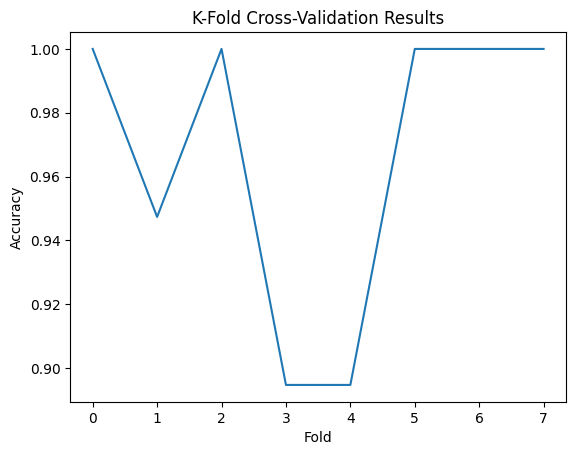

In [39]:
#plot the result
plt.plot(scores)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('K-Fold Cross-Validation Results')
plt.show()
